In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.preprocessing import StandardScaler

In [ ]:
data1 = pd.read_excel('svmtrain.xlsx')

In [ ]:
data1

,a,b,c,d,t
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
136,5.8,2.7,5.1,1.9,Iris-virginica
137,6.8,3.2,5.9,2.3,Iris-virginica
138,6.7,3.3,5.7,2.5,Iris-virginica
139,6.7,3.0,5.2,2.3,Iris-virginica


In [ ]:
x1 = data1['a']
x2 = data1['b']
x3 = data1['c']
x4 = data1['d']
x_training = np.array(list(zip(x1,x2,x3,x4)))
y_training = data1['t']

In [ ]:
nama_kelas = ['Iris-setosa','Iris-virginica','Iris-versicolor']

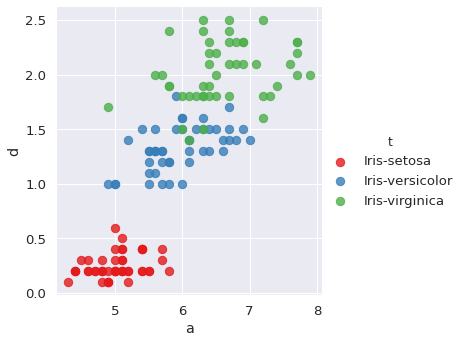

In [ ]:
# Plot two type
sns.lmplot('a', 'd', data=data1, hue='t',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
# Specify inputs for the model
# data1 = data[['a','b','c','d']].as_matrix()
label = data1[['a','b']].as_matrix()
type_label = np.where(data1['t']=='Iris-setosa', 0, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# Feature names
data_features = data1.columns.values[:4].tolist()
data_features

['a', 'b', 'c', 'd']

In [ ]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(label, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

In [ ]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


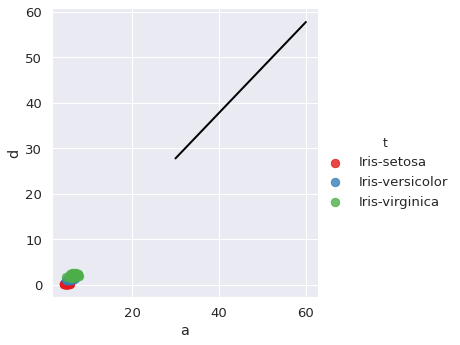

In [ ]:
# Plot the hyperplane
sns.lmplot('a', 'd', data=data1, hue='t', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

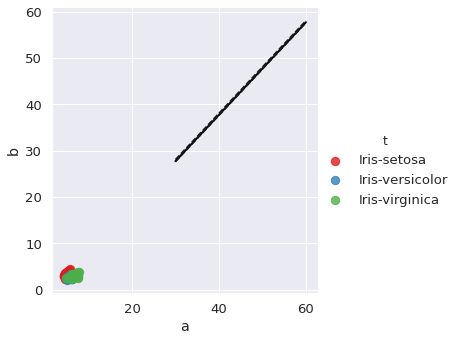

In [ ]:
# Look at the margins and support vectors
sns.lmplot('a', 'b', data=data1, hue='t', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none');